In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Step 2: Load and preprocess the dataset
train_data =pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
test_data =pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [98]:
train_data.head(5)

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

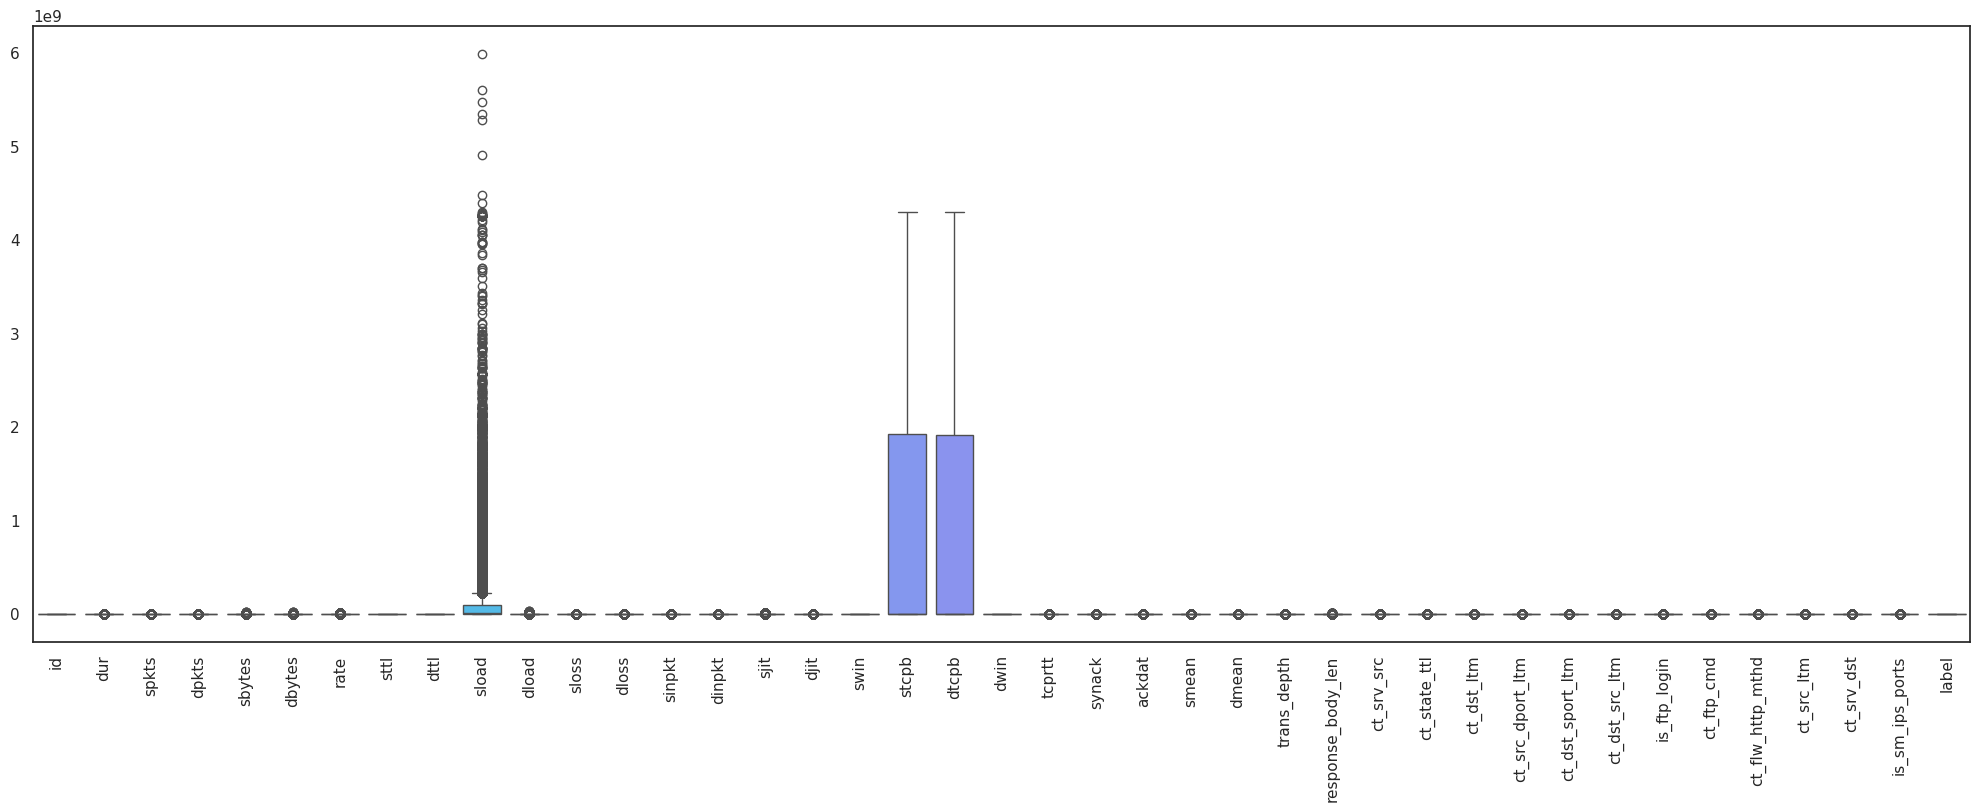

In [132]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=train_data)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

In [135]:
train_data.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login           int64
ct_ftp_cmd             int64
ct_flw_http_mthd       int64
ct_src_ltm             int64
ct_srv_dst             int64
is_sm_ips_ports        int64
attack_cat            object
label                  int64
dtype: object

In [99]:
test_data.head(5)

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

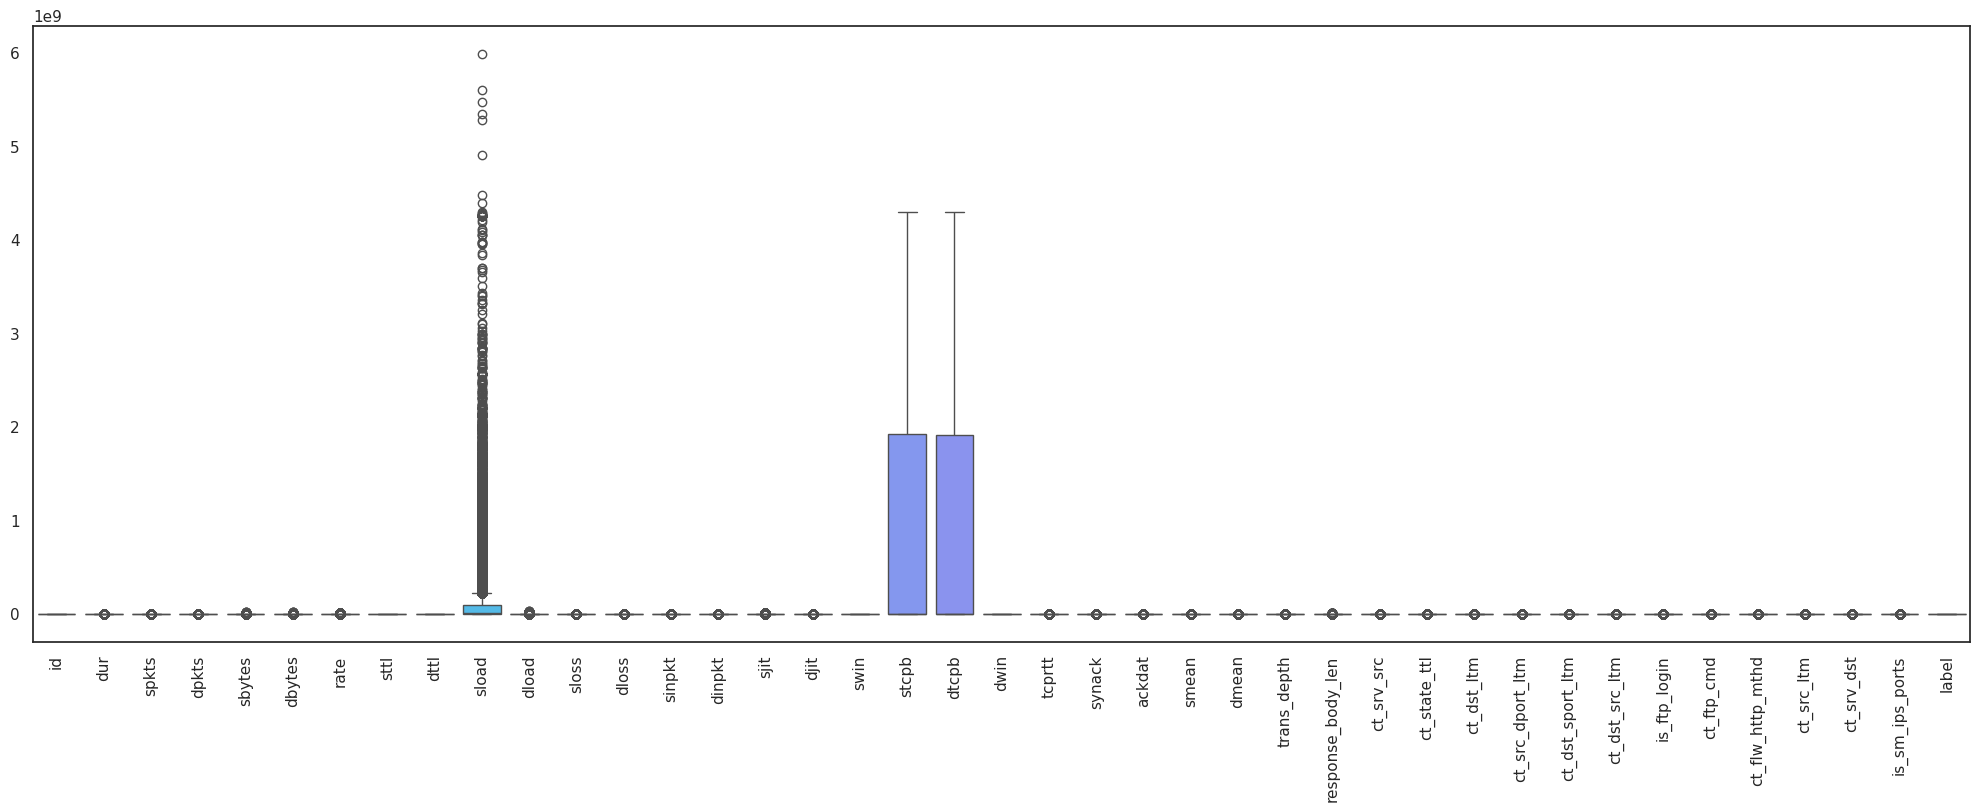

In [134]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=test_data)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

In [136]:
test_data.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login           int64
ct_ftp_cmd             int64
ct_flw_http_mthd       int64
ct_src_ltm             int64
ct_srv_dst             int64
is_sm_ips_ports        int64
attack_cat            object
label                  int64
dtype: object

In [100]:
print(train_data.columns)
print(test_data.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_d

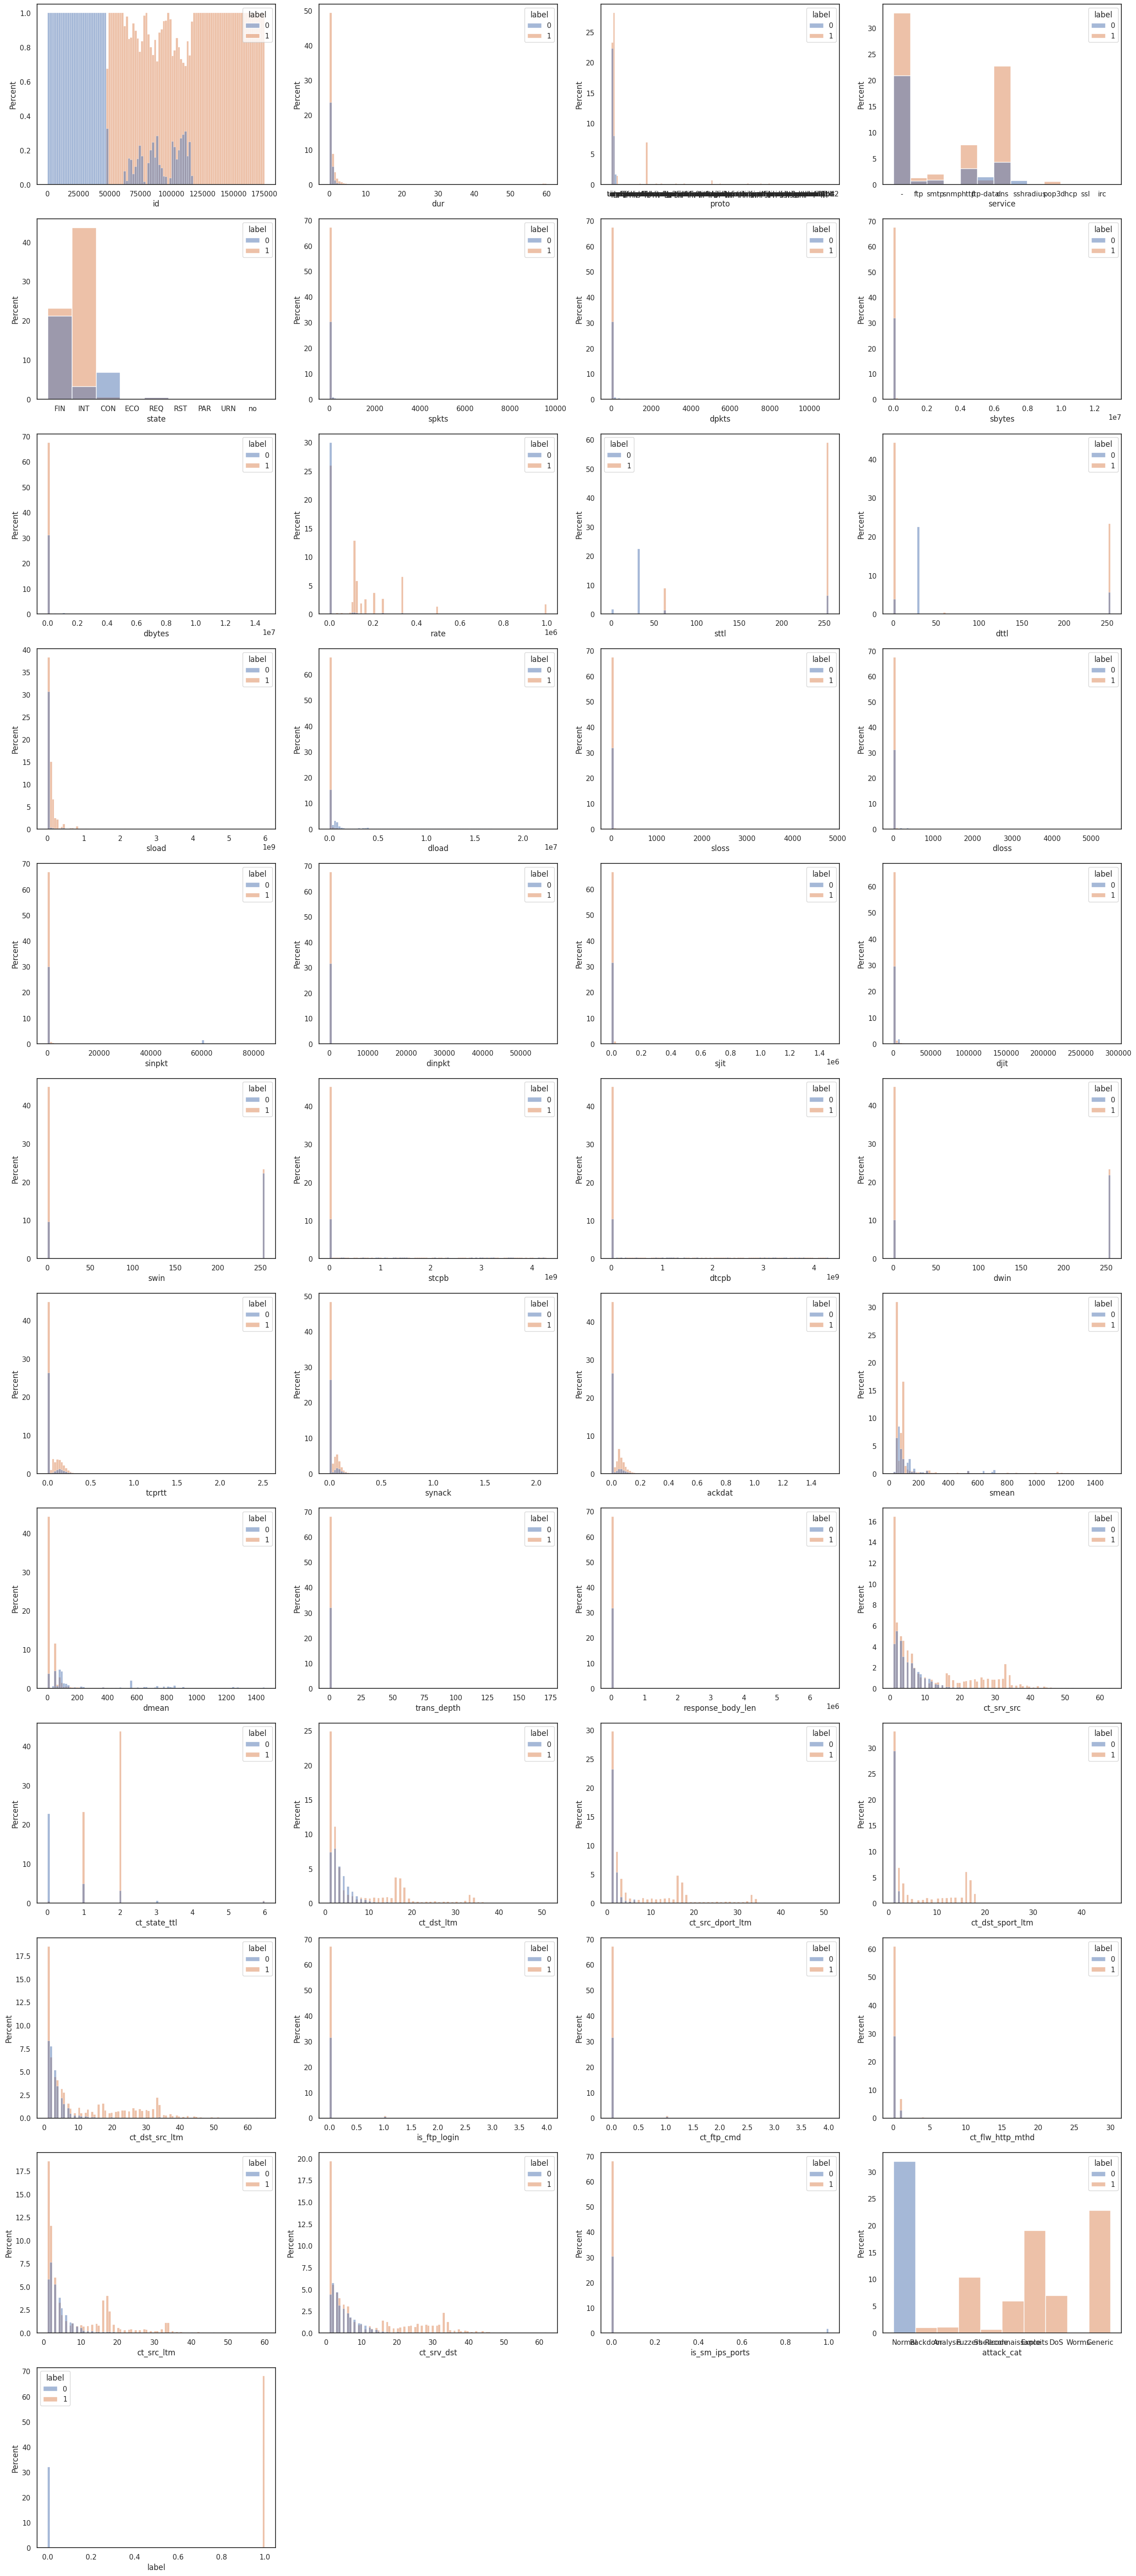

In [101]:
fig=plt.figure(figsize=(25,70))
for i, col in enumerate(train_data.columns):
    plt.subplot(15,4,i+1)
    sns.histplot(train_data,x=col, stat='percent', hue="label", bins=100, log_scale=(False, False))
fig.tight_layout()
plt.show()

In [102]:
train_data = train_data.dropna()  # Drop any missing values
test_data = test_data.dropna()  # Drop any missing values

In [103]:
# Combine train and test datasets
df = pd.concat([train_data, test_data], axis=0)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350682 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 350682 non-null  int64  
 1   dur                350682 non-null  float64
 2   proto              350682 non-null  object 
 3   service            350682 non-null  object 
 4   state              350682 non-null  object 
 5   spkts              350682 non-null  int64  
 6   dpkts              350682 non-null  int64  
 7   sbytes             350682 non-null  int64  
 8   dbytes             350682 non-null  int64  
 9   rate               350682 non-null  float64
 10  sttl               350682 non-null  int64  
 11  dttl               350682 non-null  int64  
 12  sload              350682 non-null  float64
 13  dload              350682 non-null  float64
 14  sloss              350682 non-null  int64  
 15  dloss              350682 non-null  int64  
 16  sinpkt 

In [105]:
print(df.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [106]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [107]:
print(df.shape)

(350682, 45)


In [108]:
# Data preprocessing
label_encoder = LabelEncoder()
categorical_features = [ 'proto','service', 'state']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

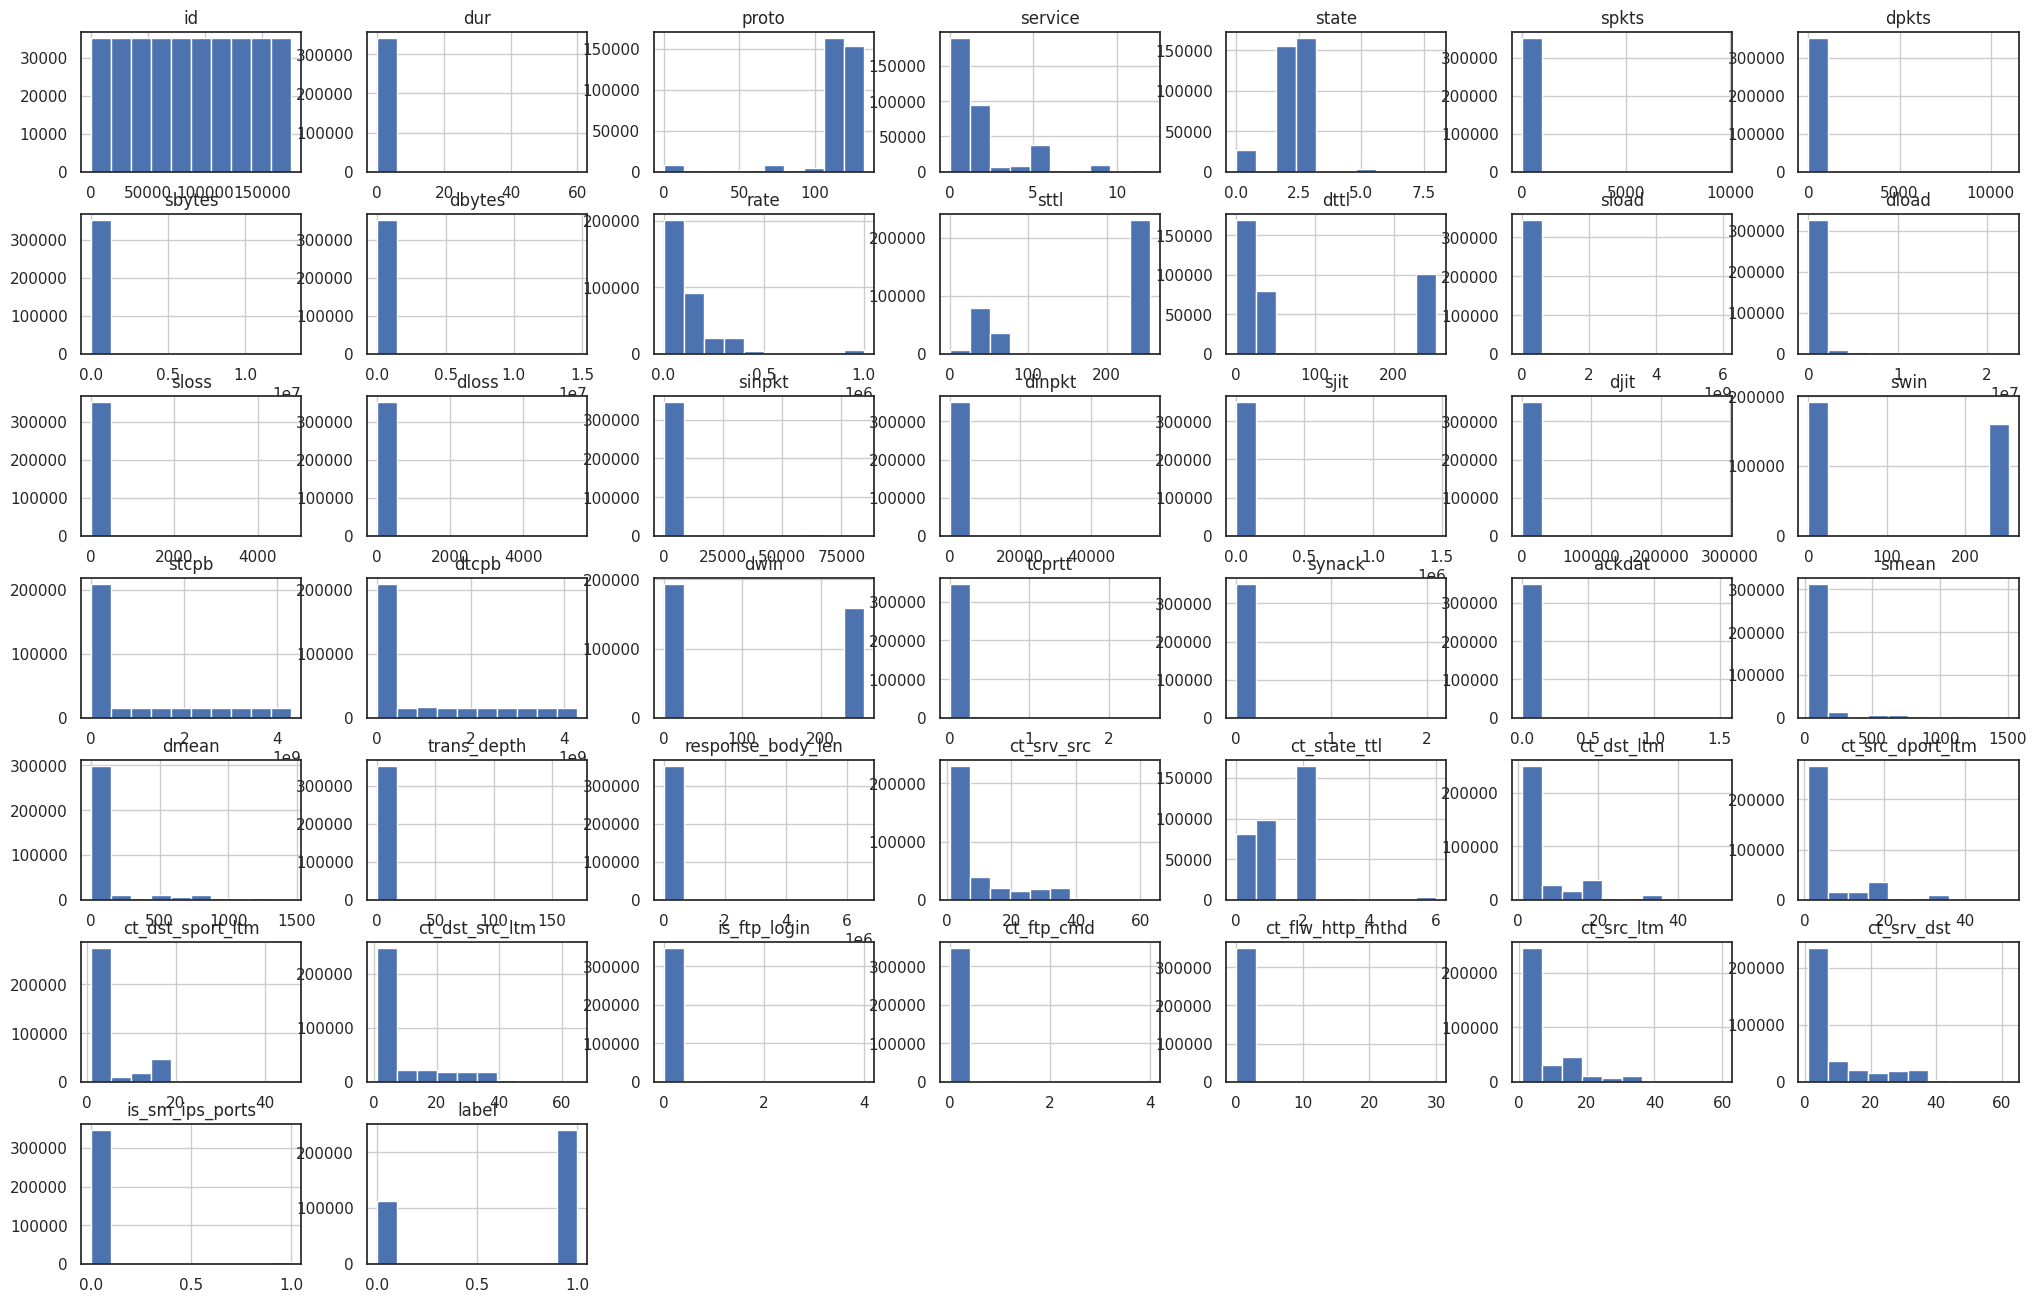

In [109]:
df.hist(figsize=(25,16))
plt.show()

In [110]:
df = df.drop(columns=['attack_cat'])

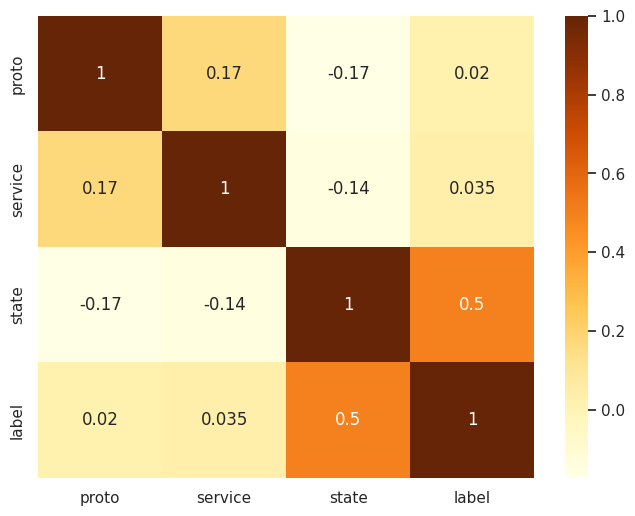

In [111]:
plt.figure(figsize=(8,6))
selected_features = df[['proto','service', 'state',	'label']]
correlation_matrix = selected_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.YlOrBr)
plt.show()

In [139]:
import plotly.express as px
px.histogram(
    df,
    x='ct_dst_ltm',
    color='label',
    marginal='box',
    color_discrete_sequence=['turquoise','blue'],histnorm='percent'
)

In [143]:
px.histogram(
    df,
    x='ct_src_ltm',
    color='label',
    marginal='box',
    histnorm='percent'
)

In [144]:
px.histogram(df,x='sttl',color='label',barmode='group',histnorm='percent' )

In [145]:
px.histogram(df,x='dttl',color='label',barmode='group')

In [146]:
px.histogram(df,x='ct_state_ttl',color='label',barmode='group')

In [147]:
px.histogram(
    df,
    x='ct_srv_dst',
    color='label',
    marginal='box',
    histnorm='percent'
)

In [112]:
# Train-test split
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
df.describe()

id            dur          proto        service  \
count  350682.000000  350682.000000  350682.000000  350682.000000   
mean    87671.000000       1.359389     109.606675       1.618920   
std     50616.658943       6.480240      22.352569       2.305147   
min         1.000000       0.000000       0.000000       0.000000   
25%     43836.000000       0.000008     113.000000       0.000000   
50%     87671.000000       0.001582     113.000000       0.000000   
75%    131506.000000       0.668069     119.000000       2.000000   
max    175341.000000      59.999989     132.000000      12.000000   

               state          spkts          dpkts        sbytes  \
count  350682.000000  350682.000000  350682.000000  3.506820e+05   
mean        2.355176      20.298664      18.969591  8.844844e+03   
std         0.867941     136.887402     110.258113  1.747654e+05   
min         0.000000       1.000000       0.000000  2.800000e+01   
25%         2.000000       2.000000       0.000000  1.140000e+02   
50%         2.000000       2.000000       2.000000  4.300000e+02   
75%         3.000000      12.000000      10.000000  1.418000e+03   
max         8.000000    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
count  3.506820e+05  3.506820e+05  ...     350682.000000     350682.000000   
mean   1.492892e+04  9.540619e+04  ...          5.383538          4.206255   
std    1.436540e+05  1.654007e+05  ...          8.047093          5.783577   
min    0.000000e+00  0.000000e+00  ...          1.000000          1.000000   
25%    0.000000e+00  3.278614e+01  ...          1.000000          1.000000   
50%    1.640000e+02  3.225807e+03  ...          1.000000          1.000000   
75%    1.102000e+03  1.250000e+05  ...          5.000000          3.000000   
max    1.465555e+07  1.000000e+06  ...         51.000000         46.000000   

       ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd  \
count   350682.000000  350682.000000  350682.000000     350682.000000   
mean         8.729881       0.014948       0.014948          0.133066   
std         10.956170       0.126048       0.126048          0.701207   
min          1.000000       0.000000       0.000000          0.000000   
25%          1.000000       0.000000       0.000000          0.000000   
50%          3.000000       0.000000       0.000000          0.000000   
75%         12.000000       0.000000       0.000000          0.000000   
max         65.000000       4.000000       4.000000         30.000000   

          ct_src_ltm     ct_srv_dst  is_sm_ips_ports          label  
count  350682.000000  350682.000000    350682.000000  350682.000000  
mean        6.955789       9.100758         0.015752       0.680622  
std         8.321481      10.756937         0.124515       0.466236  
min         1.000000       1.000000         0.000000       0.000000  
25%         2.000000       2.000000         0.000000       0.000000  
50%         3.000000       4.000000         0.000000       1.000000  
75%         9.000000      12.000000         0.000000       1.000000  
max        60.000000      62.000000         1.000000       1.000000  

[8 rows x 44 columns]

Accuracy Score: 0.9508390721017437
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     22339
           1       0.95      0.98      0.96     47798

    accuracy                           0.95     70137
   macro avg       0.95      0.93      0.94     70137
weighted avg       0.95      0.95      0.95     70137

Confusion Matrix:
 [[19860  2479]
 [  969 46829]]


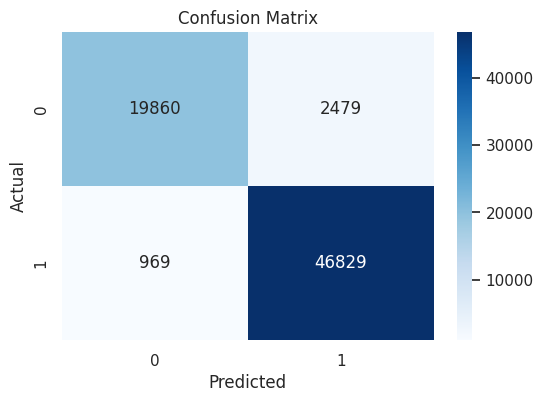

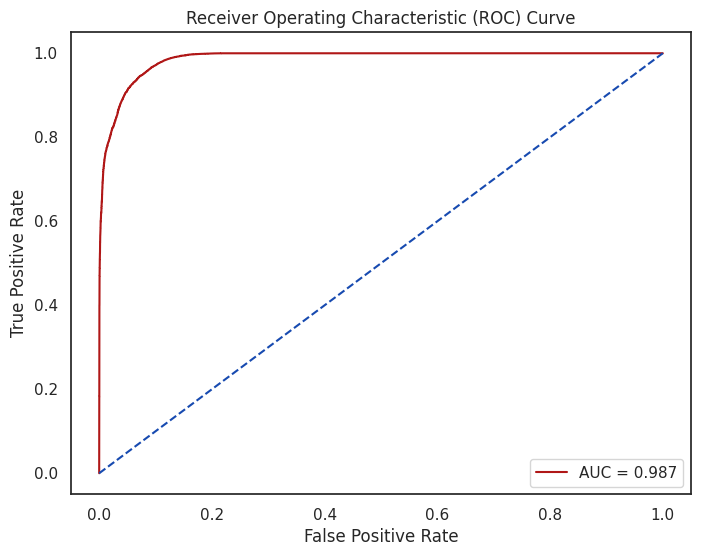

In [115]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_pred)

print(f"Accuracy Score: {logreg_score}")

# Generate and print the classification report
class_report = classification_report(y_test, logreg_pred)
print("Classification Report:\n", class_report)

# Generate and print the confusion matrix

conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the predicted probabilities for the ROC curve
predicted_probab_log = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_probab_log)
from sklearn import metrics

# Calculate AUC
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

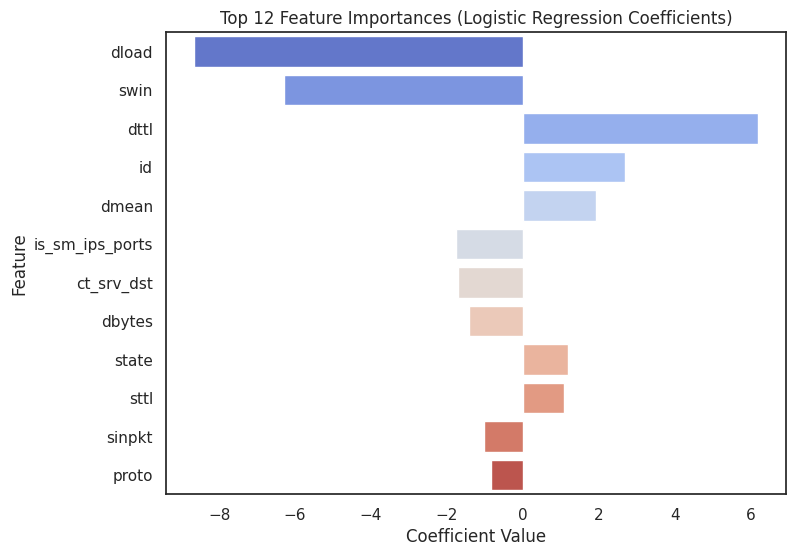

In [116]:

# Get the feature names from the original DataFrame
feature_names = X.columns

# Get the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

# Create a DataFrame for feature importance
f_imp3 = pd.DataFrame({
    'feature': feature_names,
    'importance': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
f_imp3['absolute_importance'] = f_imp3['importance'].abs()
f_imp3 = f_imp3.sort_values('absolute_importance', ascending=False)

# Display the top 12 features with a background gradient
top_features = f_imp3.head(12)
display(top_features.style.background_gradient(cmap='Blues'))

# Plot the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=top_features, palette='coolwarm')
plt.title('Top 12 Feature Importances (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Accuracy Score: 0.970443560460242
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95     22339
           1       0.98      0.98      0.98     47798

    accuracy                           0.97     70137
   macro avg       0.97      0.96      0.97     70137
weighted avg       0.97      0.97      0.97     70137

Confusion Matrix:
 [[21155  1184]
 [  889 46909]]


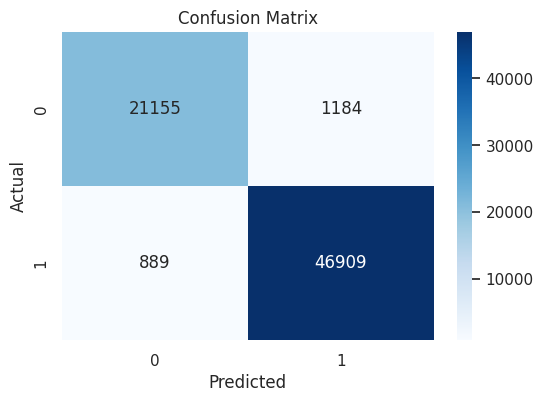

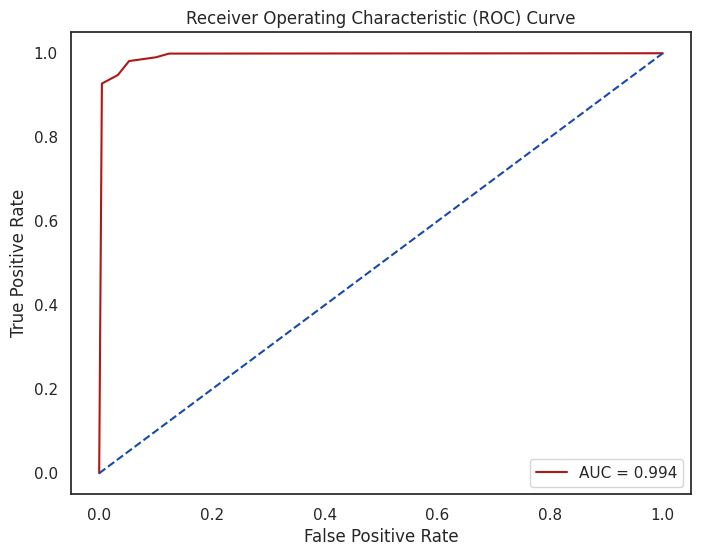

In [117]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
print(f"Accuracy Score: {knn_score}")

# Generate and print the classification report
class_report = classification_report(y_test, knn_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the predicted probabilities for the ROC curve
predicted_probab_log = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_probab_log)
from sklearn import metrics

# Calculate AUC
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Feature Importance (using permutation importance for KNN)
from sklearn.inspection import permutation_importance

# Compute permutation importance
results = permutation_importance(knn, X_test, y_test, scoring='accuracy')

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': results.importances_mean
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the top features by importance
print("Feature Importance:\n", feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy Score: 0.9983460940730285
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22339
           1       1.00      1.00      1.00     47798

    accuracy                           1.00     70137
   macro avg       1.00      1.00      1.00     70137
weighted avg       1.00      1.00      1.00     70137

Confusion Matrix:
 [[22287    52]
 [   64 47734]]


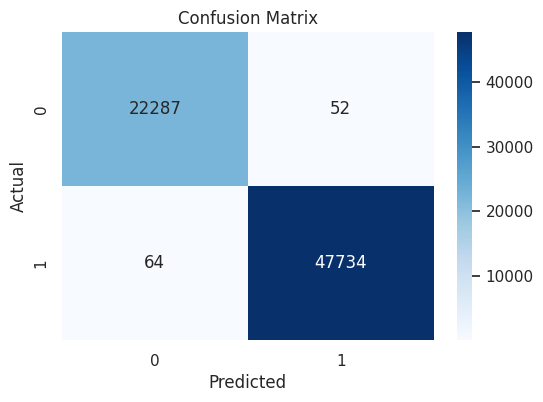

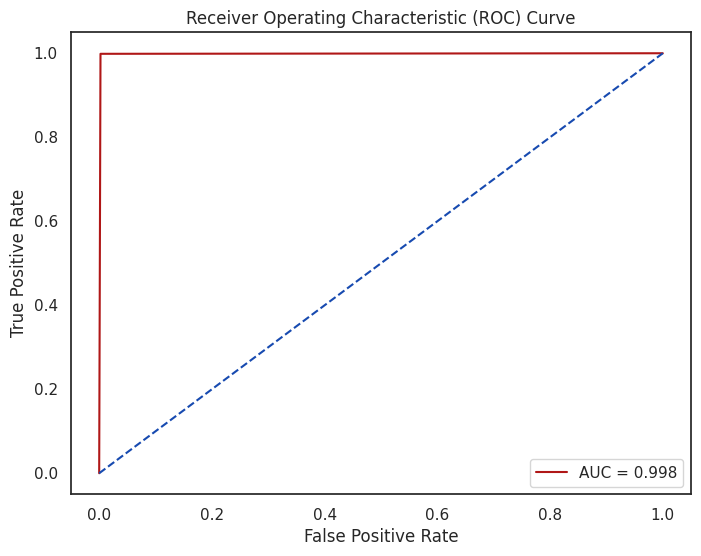

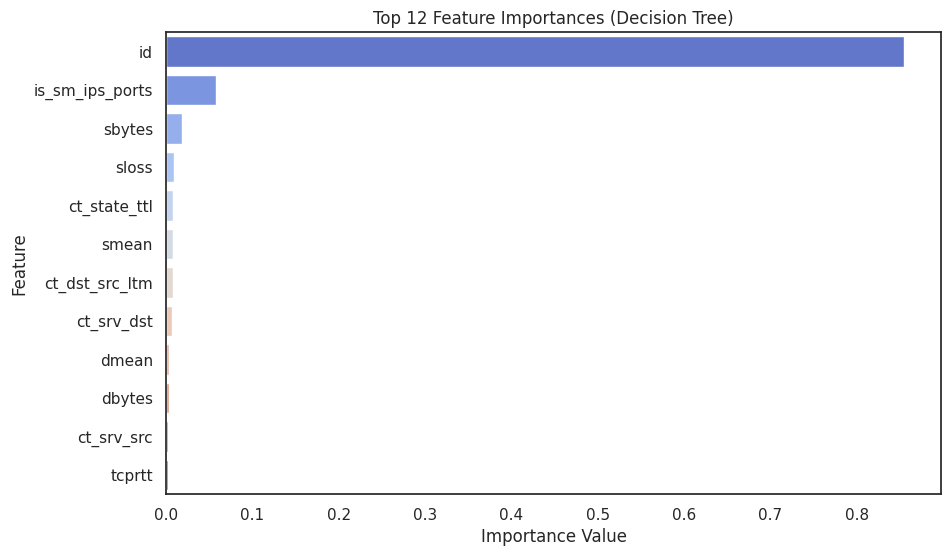

In [118]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_score = accuracy_score(y_test, dtree_pred)
print(f"Accuracy Score: {dtree_score}")

# Generate and print the classification report
class_report = classification_report(y_test, dtree_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, dtree_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the predicted probabilities for the ROC curve
predicted_probab_log = dtree.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_probab_log)
from sklearn import metrics

# Calculate AUC
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Feature importance
feature_names = X.columns
importances = dtree.feature_importances_

# Create a DataFrame for feature importance
f_imp_dtree = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the DataFrame by the importance
f_imp_dtree = f_imp_dtree.sort_values('importance', ascending=False)

# Display the top 12 features with a background gradient
top_features_dtree = f_imp_dtree.head(12)
display(top_features_dtree.style.background_gradient(cmap='Blues'))

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features_dtree, palette='coolwarm')
plt.title('Top 12 Feature Importances (Decision Tree)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

Accuracy Score: 0.9980324222592926
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22339
           1       1.00      1.00      1.00     47798

    accuracy                           1.00     70137
   macro avg       1.00      1.00      1.00     70137
weighted avg       1.00      1.00      1.00     70137

Confusion Matrix:
 [[22229   110]
 [   28 47770]]


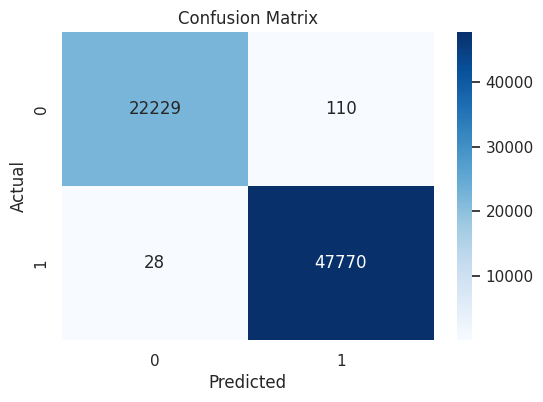

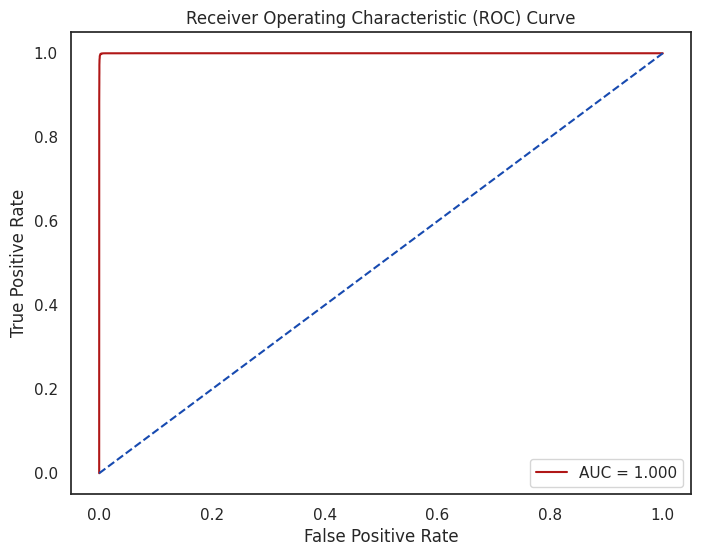

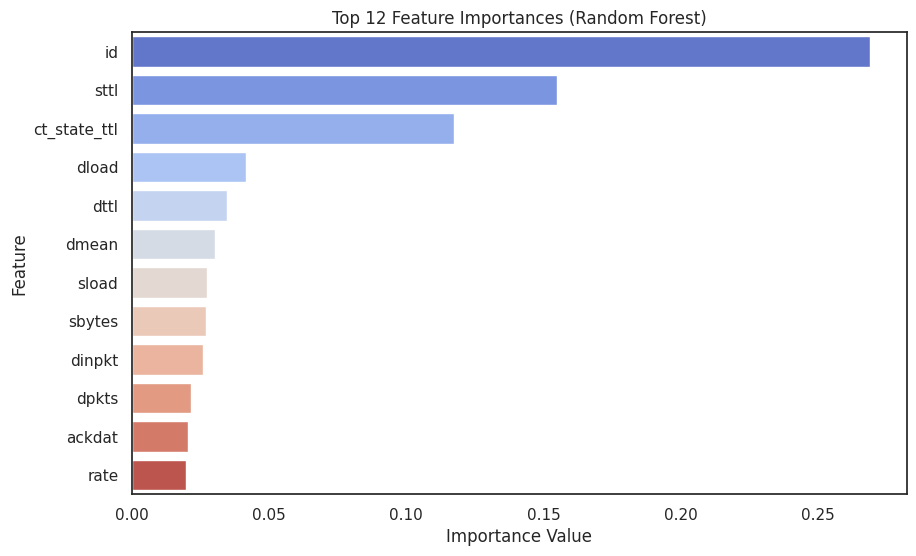

In [119]:
# Random Forest
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_score = accuracy_score(y_test, rforest_pred)
print(f"Accuracy Score: {rforest_score}")

# Generate and print the classification report
class_report = classification_report(y_test, rforest_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, rforest_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the predicted probabilities for the ROC curve
predicted_probab_log = rforest.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_probab_log)
from sklearn import metrics

# Calculate AUC
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Feature importance
feature_names = X.columns
importances = rforest.feature_importances_

# Create a DataFrame for feature importance
f_imp_rforest = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the DataFrame by the importance
f_imp_rforest = f_imp_rforest.sort_values('importance', ascending=False)

# Display the top 12 features with a background gradient
top_features_rforest = f_imp_rforest.head(12)
display(top_features_rforest.style.background_gradient(cmap='Blues'))

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features_rforest, palette='coolwarm')
plt.title('Top 12 Feature Importances (Random Forest)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

Accuracy Score: 0.8823302964198639
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81     22339
           1       0.90      0.93      0.92     47798

    accuracy                           0.88     70137
   macro avg       0.87      0.86      0.86     70137
weighted avg       0.88      0.88      0.88     70137

Confusion Matrix:
 [[17445  4894]
 [ 3359 44439]]


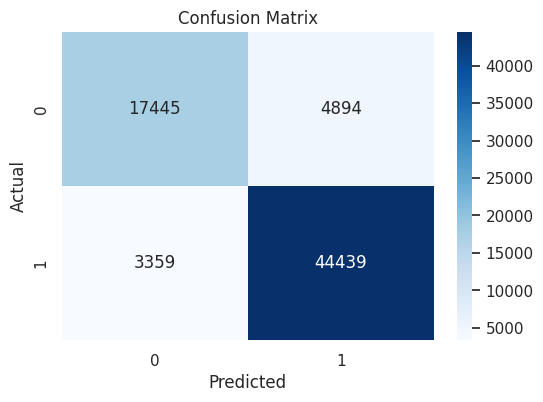

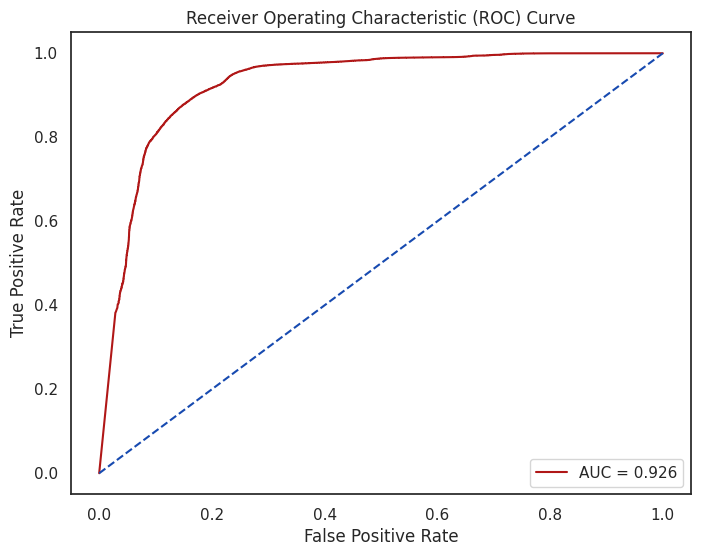

Feature Statistics:
               feature  mean_class_0  variance_class_0  mean_class_1  \
13              dload      0.575447          2.638006     -0.270296   
28              dmean      0.500604          1.576315     -0.235141   
20               swin      0.487464          0.848762     -0.228969   
23               dwin      0.467364          0.873533     -0.219528   
21              stcpb      0.373785          1.116009     -0.175572   
22              dtcpb      0.365508          1.111285     -0.171684   
42    is_sm_ips_ports      0.270898          3.021096     -0.127245   
16             sinpkt      0.257657          2.979998     -0.121025   
6               dpkts      0.171987          0.903901     -0.080785   
15              dloss      0.137074          0.852137     -0.064386   
8              dbytes      0.111534          0.931734     -0.052389   
19               djit      0.087682          2.322220     -0.041186   
5               spkts      0.079228          0.184663   

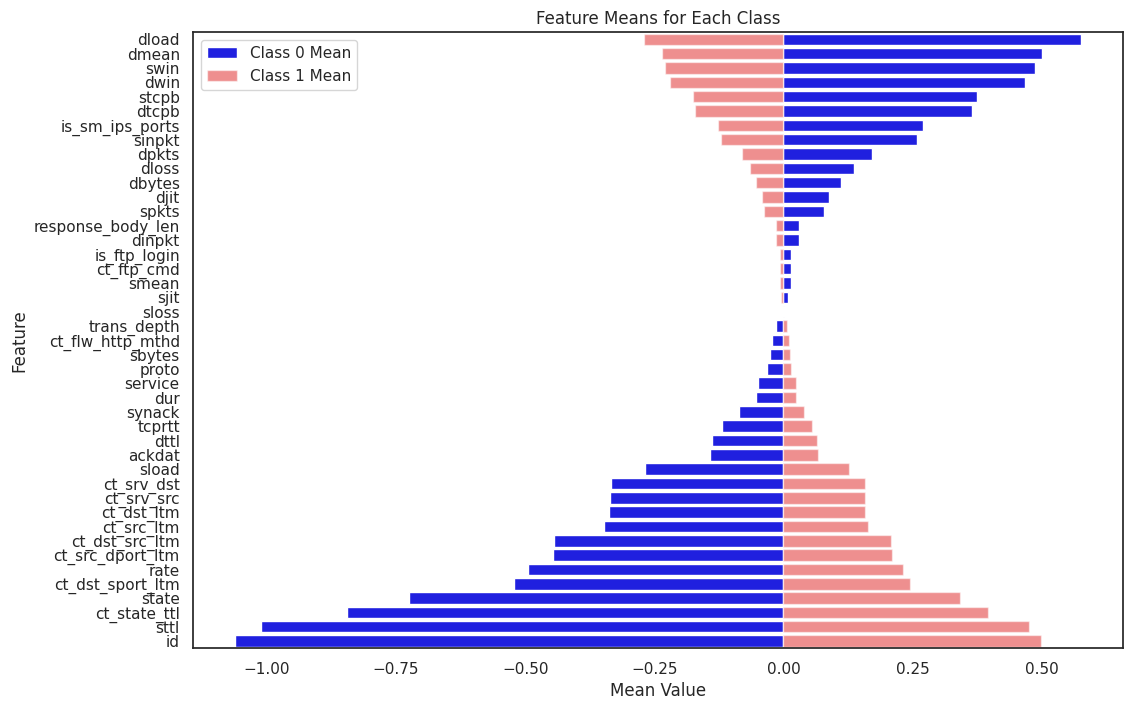

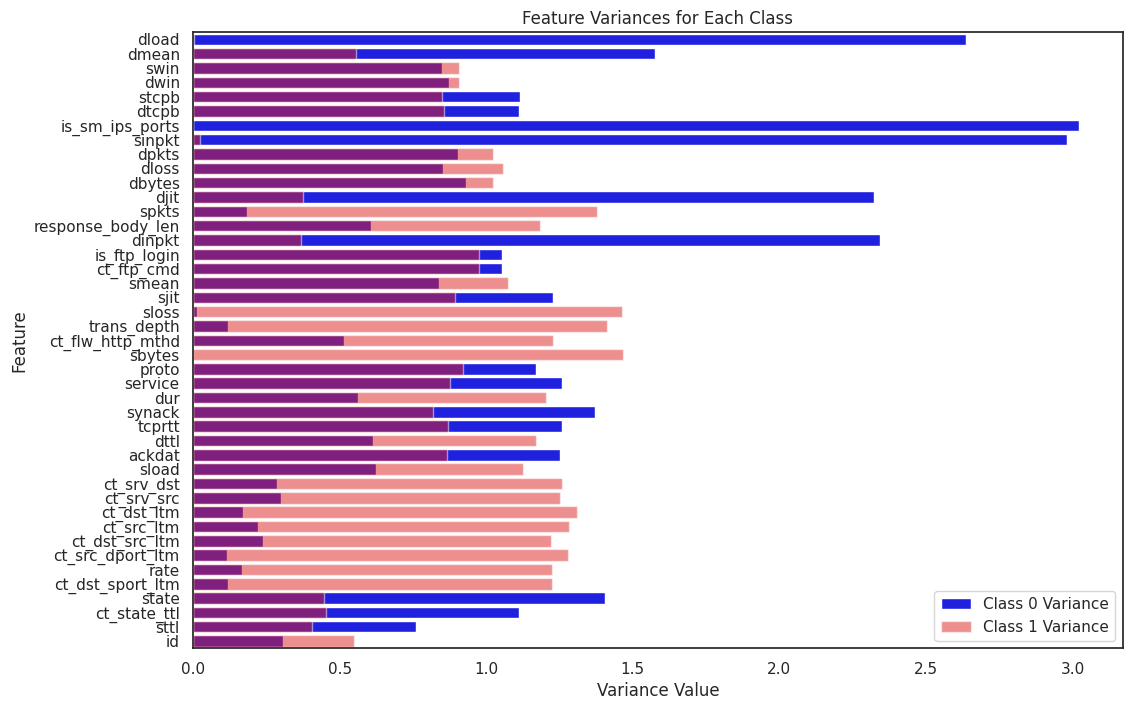

In [120]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
naive_bayes_score = accuracy_score(y_test, naive_bayes_pred)
print(f"Accuracy Score: {naive_bayes_score}")

# Generate and print the classification report
class_report = classification_report(y_test, naive_bayes_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, naive_bayes_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the predicted probabilities for the ROC curve
predicted_probab_log = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_probab_log)
from sklearn import metrics

# Calculate AUC
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


# Assess feature impact via means and variances (GaussianNB specific)
means = naive_bayes.theta_
variances = naive_bayes.var_

# Create a DataFrame to hold feature statistics
feature_stats = pd.DataFrame({
    'feature': X.columns,
    'mean_class_0': means[0],
    'variance_class_0': variances[0],
    'mean_class_1': means[1],
    'variance_class_1': variances[1]
})

# Sort features by mean in class 0 for demonstration
feature_stats_sorted = feature_stats.sort_values(by='mean_class_0', ascending=False)

# Display the top features by mean in class 0
print("Feature Statistics:\n", feature_stats_sorted)

# Plot feature means for each class
plt.figure(figsize=(12, 8))
sns.barplot(x='mean_class_0', y='feature', data=feature_stats_sorted, color='blue', label='Class 0 Mean')
sns.barplot(x='mean_class_1', y='feature', data=feature_stats_sorted, color='red', label='Class 1 Mean', alpha=0.5)
plt.title('Feature Means for Each Class')
plt.xlabel('Mean Value')
plt.ylabel('Feature')
plt.legend()
plt.show()

# Plot feature variances for each class
plt.figure(figsize=(12, 8))
sns.barplot(x='variance_class_0', y='feature', data=feature_stats_sorted, color='blue', label='Class 0 Variance')
sns.barplot(x='variance_class_1', y='feature', data=feature_stats_sorted, color='red', label='Class 1 Variance', alpha=0.5)
plt.title('Feature Variances for Each Class')
plt.xlabel('Variance Value')
plt.ylabel('Feature')
plt.legend()
plt.show()




In [121]:
import pandas as pd

# Create a DataFrame with the algorithm names and accuracy scores
accuracy_scores = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Accuracy Score': [logreg_score, knn_score, dtree_score, rforest_score, naive_bayes_score]
})

# Sort the DataFrame by accuracy score in descending order
accuracy_scores = accuracy_scores.sort_values(by='Accuracy Score', ascending=False)

# Add a Rank column based on the sorted accuracy scores
accuracy_scores['Rank'] = range(1, len(accuracy_scores) + 1)

# Reorder the DataFrame columns
accuracy_scores = accuracy_scores[['Rank', 'Algorithm', 'Accuracy Score']]

# Display the ranking table
accuracy_scores


Rank            Algorithm  Accuracy Score
2     1        Decision Tree        0.998346
3     2        Random Forest        0.998032
1     3  K-Nearest Neighbors        0.970444
0     4  Logistic Regression        0.950839
4     5          Naive Bayes        0.882330

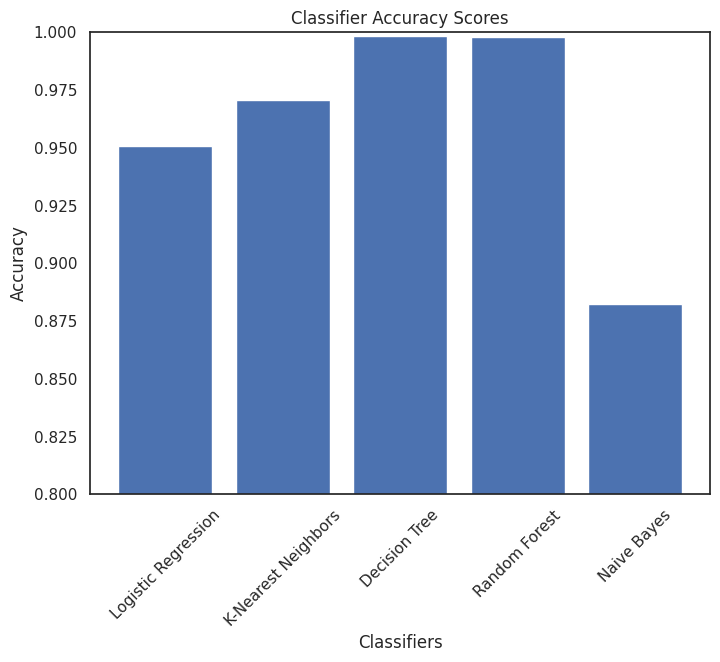

In [122]:
# Store classifier names and their respective scores
classifier_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes']
scores = [logreg_score, knn_score, dtree_score, rforest_score, naive_bayes_score]

# Plot the classifier accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(classifier_names, scores)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Scores')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

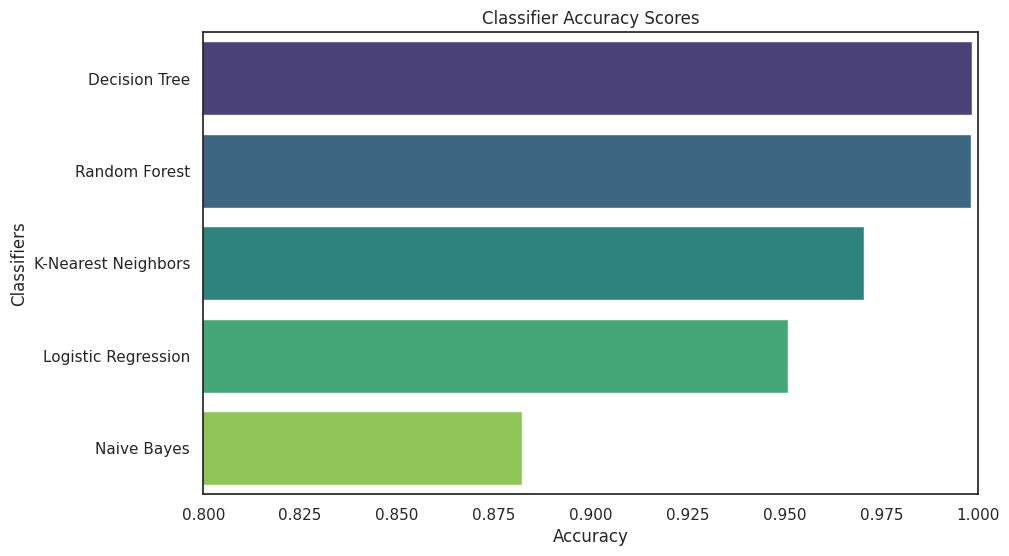

In [123]:
import pandas as pd
import seaborn as sns

# Create a DataFrame with classifier names and their respective scores
accuracy_df = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': scores})

# Sort the DataFrame by accuracy scores in descending order
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)

# Plot the sorted classifier accuracy scores using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Classifier', data=accuracy_df, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Classifiers')
plt.title('Classifier Accuracy Scores')
plt.xlim(0.8, 1.0)
plt.show()


In [124]:
import pandas as pd

# Load data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')

# Print the column names
print(df.columns)


Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


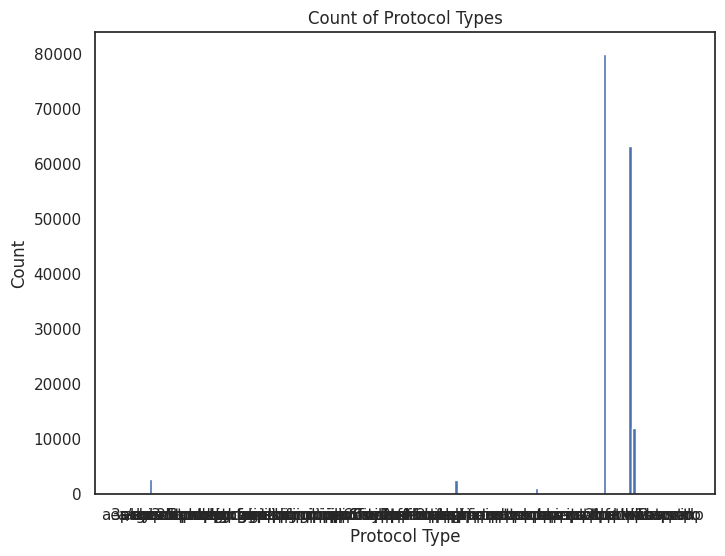

In [125]:

# Extract the first 8 characters of the 'proto' column to create a new column 'proto_type'
df['proto_type'] = df['proto'].str[:8]

# Group the dataset by 'proto_type' and count the number of occurrences of each type
proto_count = df.groupby('proto_type').size()

# Visualize the count of each protocol type
plt.figure(figsize=(8,6))
plt.bar(proto_count.index, proto_count.values)
plt.title('Count of Protocol Types')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()


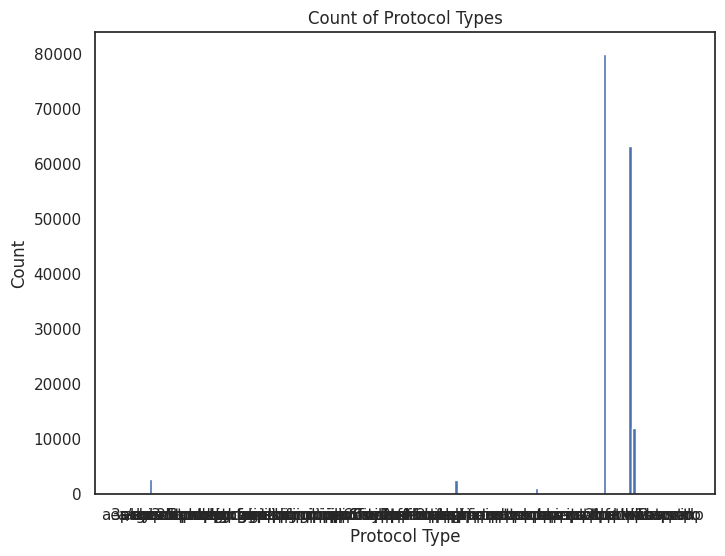

In [126]:


# Extract the first 8 characters of the 'proto' column to create a new column 'proto_type'
df['proto_type'] = df['proto'].str[:8]

# Group the dataset by 'proto_type' and count the number of occurrences of each type
proto_count = df.groupby('proto_type').size()

# Visualize the count of each protocol type
plt.figure(figsize=(8,6))
plt.bar(proto_count.index, proto_count.values)
plt.title('Count of Protocol Types')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()


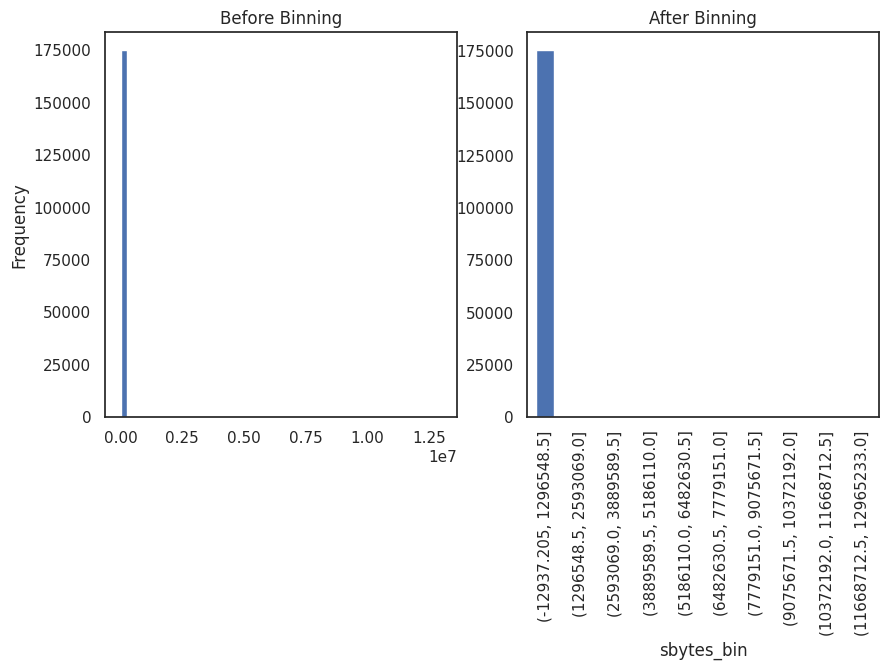

In [127]:



# Bin the 'sbytes' feature
df['sbytes_bin'] = pd.cut(df['sbytes'], bins=10)

# Plot the distribution of 'sbytes' before and after binning
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
df['sbytes'].plot(kind='hist', bins=50, ax=ax1, title='Before Binning')
df['sbytes_bin'].value_counts(sort=False).plot(kind='bar', ax=ax2, title='After Binning')
plt.show()


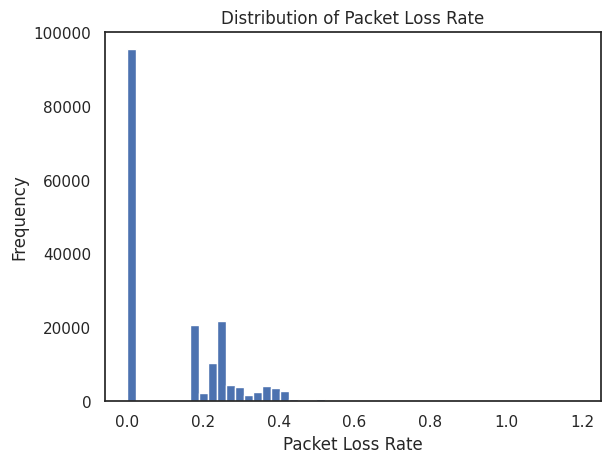

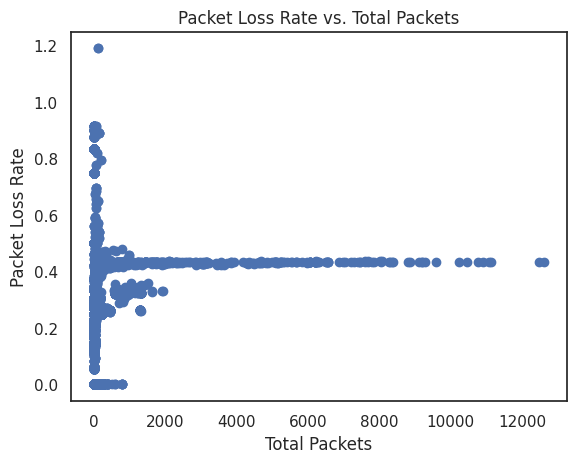

In [128]:



# Create a new feature: total_packets
df['total_packets'] = df['spkts'] + df['dpkts']

# Create a new feature: packet_loss_rate
df['packet_loss_rate'] = (df['sloss'] + df['dloss']) / df['total_packets']

# Create a histogram of packet loss rate
plt.hist(df['packet_loss_rate'], bins=50)
plt.xlabel('Packet Loss Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Packet Loss Rate')
plt.show()

# Create a scatter plot of packet loss rate vs. total packets
plt.scatter(df['total_packets'], df['packet_loss_rate'])
plt.xlabel('Total Packets')
plt.ylabel('Packet Loss Rate')
plt.title('Packet Loss Rate vs. Total Packets')
plt.show()


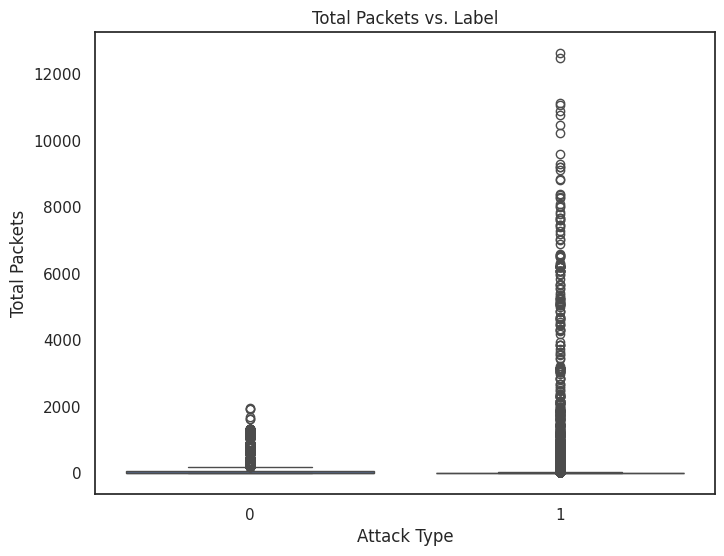

In [129]:
# create new feature
df['total_packets'] = train_data['spkts'] + test_data['dpkts']

# visualize relationship between new feature and target variable
plt.figure(figsize=(8,6))
sns.boxplot(x='label', y='total_packets', data=df)
plt.title('Total Packets vs. Label')
plt.xlabel('Attack Type')
plt.ylabel('Total Packets')
plt.show()


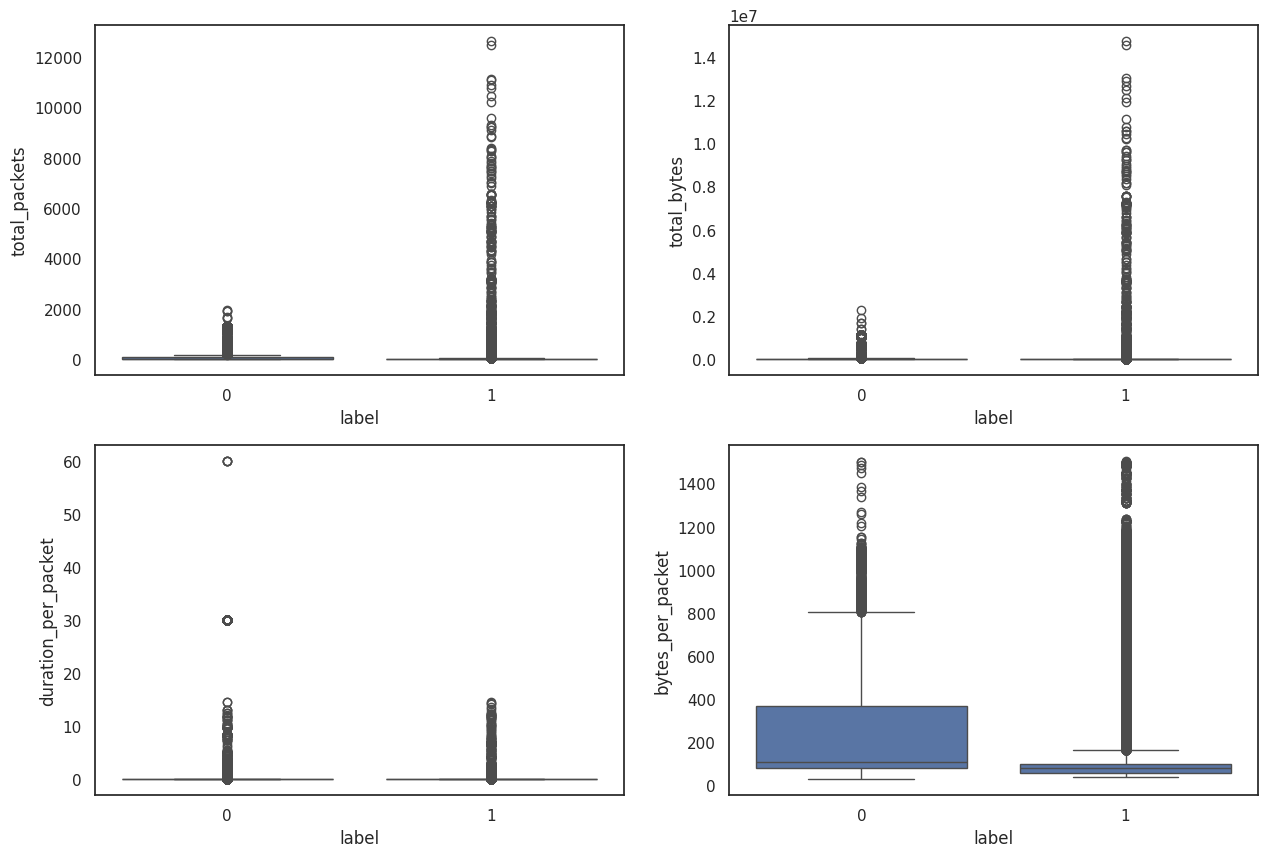

In [130]:
# Feature engineering
df['total_packets'] = df['spkts'] + df['dpkts']
df['total_bytes'] = df['sbytes'] + df['dbytes']
df['duration_per_packet'] = df['dur'] / df['total_packets']
df['bytes_per_packet'] = df['total_bytes'] / df['total_packets']

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='label', y='total_packets', data=df, ax=axs[0,0])
sns.boxplot(x='label', y='total_bytes', data=df, ax=axs[0,1])
sns.boxplot(x='label', y='duration_per_packet', data=df, ax=axs[1,0])
sns.boxplot(x='label', y='bytes_per_packet', data=df, ax=axs[1,1])
plt.show()


In [131]:
scores # Cross-validation

[0.9508390721017437,
 0.970443560460242,
 0.9983460940730285,
 0.9980324222592926,
 0.8823302964198639]